# A Toy Model of Matrix-Weighted Networks
### Hiroki Sayama
March 25, 2024

In [75]:
from matplotlib import pyplot as plt
import numpy as np
import networkx as nx

In [76]:
n = 100 # number of nodes
p = 0.1 # probability of edges
k = 10  # size of matrix weights (k x k)

m_w = 0  # mean of random weight elements
s_w = 1  # standard deviation of random weight elements

m_s = 0  # mean of random state elements
s_s = 1  # standard deviation of random state elements

In [89]:
def plot_trajectory(v_history):
    plt.plot([x[1][0] for x in v_history], [x[1][1] for x in v_history], np.random.choice(list('kbrmgcy')) + 'o:', alpha = 0.3);
    plt.axis('image');

In [90]:
g = nx.erdos_renyi_graph(n, p)
for s, d in g.edges:
    g[s][d]['weight'] = np.random.normal(m_w, s_w, [k, k]) # matrix-based weight

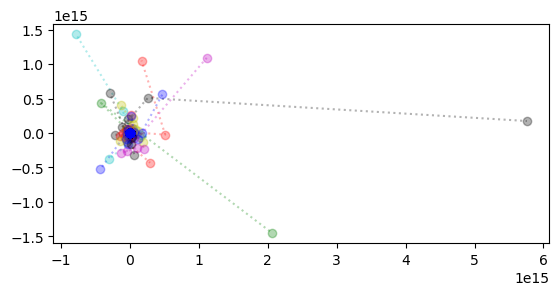

In [93]:
for j in range(30):

    # initialization
    vloc = np.random.choice(g.nodes)
    v = np.random.normal(m_s, s_s, k) # state vector
    v_history = [(vloc, v)]

    # random walk simulation
    for t in range(30):
        nvloc = np.random.choice(list(g.neighbors(vloc)))
        v = g[vloc][nvloc]['weight'] @ v    
        vloc = nvloc
        v_history.append((vloc, v))

    # plotting
    plot_trajectory(v_history)